In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
df_us = pd.read_csv('us.csv')

In [3]:
df_us.set_index('date', inplace = True)

In [4]:
df_us.shape

(239, 2)

In [5]:
df_us.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

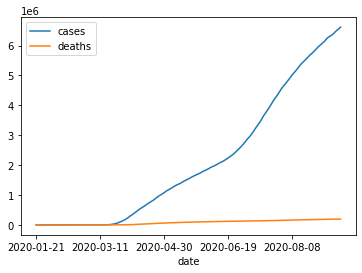

In [6]:
df_us.plot()

## Checking Stationarity

In [7]:
test = adfuller(df_us['cases'])
test_cases = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases)

Test Statstic                    1.486874
p-value                          0.997475
#Lags Used                      15.000000
Number of Observations Used    223.000000
dtype: float64


Data not stationary

In [8]:
test = adfuller(df_us['deaths'])
test_deaths = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_deaths)

Test Statstic                   -0.152039
p-value                          0.944002
#Lags Used                      14.000000
Number of Observations Used    224.000000
dtype: float64


Data not stationary

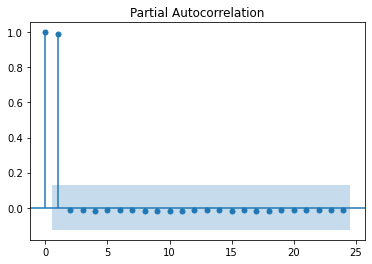

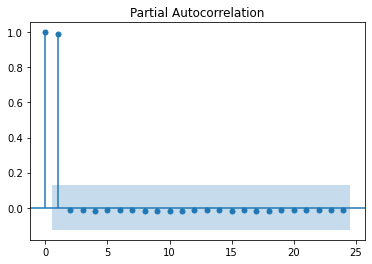

In [9]:
plot_pacf(df_us['cases'], alpha = 0.05)

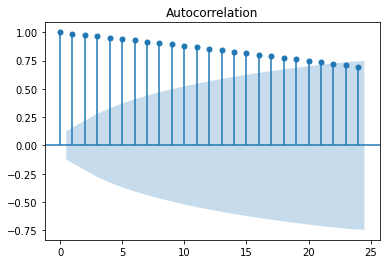

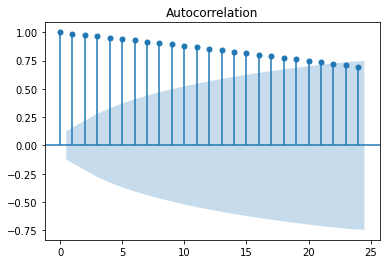

In [10]:
plot_acf(df_us['cases'], alpha = 0.05)

## Differencing

In [11]:
df_us['cases_diff'] = df_us['cases'] - df_us['cases'].shift(1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

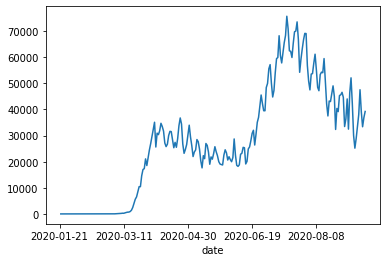

In [12]:
df_us['cases_diff'].plot()

In [13]:
test = adfuller(df_us['cases_diff'].dropna())
test_cases_diff = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases_diff)

Test Statstic                   -1.917469
p-value                          0.323889
#Lags Used                      15.000000
Number of Observations Used    222.000000
dtype: float64


In [14]:
df_us['cases_diff2'] = df_us['cases_diff'] - df_us['cases_diff'].shift(1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

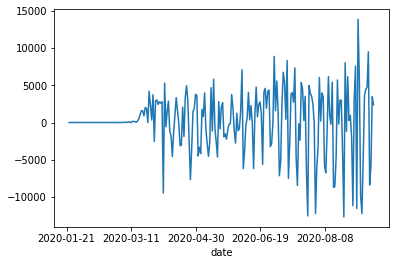

In [15]:
df_us['cases_diff2'].plot()


In [16]:
test = adfuller(df_us['cases_diff2'].dropna())
test_cases_diff2 = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases_diff2)

Test Statstic                   -2.255084
p-value                          0.186864
#Lags Used                      14.000000
Number of Observations Used    222.000000
dtype: float64


In [17]:
df_us['cases_diff3'] = df_us['cases_diff2'] - df_us['cases_diff2'].shift(1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

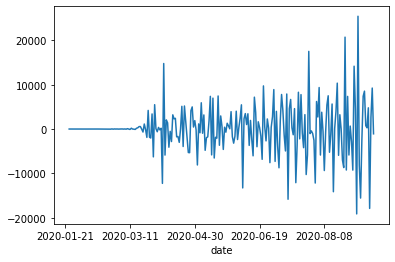

In [18]:
df_us['cases_diff3'].plot()


In [19]:
test = adfuller(df_us['cases_diff3'].dropna())
test_cases_diff3 = pd.Series(test[0:4], index = ['Test Statstic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(test_cases_diff3)



Test Statstic                 -6.767610e+00
p-value                        2.692139e-09
#Lags Used                     1.300000e+01
Number of Observations Used    2.220000e+02
dtype: float64


### Stationarity Achieved

In [20]:
ar_model = AutoReg(df_us['cases_diff3'].dropna(), lags=1)
ar_model_fit = ar_model.fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [21]:
preds = ar_model_fit.predict(len(df_us['cases_diff3'].dropna()), len(df_us['cases_diff3'].dropna()))
print(preds)

2020-09-16    383.843326
Freq: D, dtype: float64


In [25]:
preds + df_us['cases_diff3'][len(df_us)-1] + df_us['cases_diff3'][len(df_us)-1]


2020-09-16   -1774.156674
Freq: D, dtype: float64